In [41]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
import cufflinks as cf
cf.go_offline()

In [42]:
data = pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


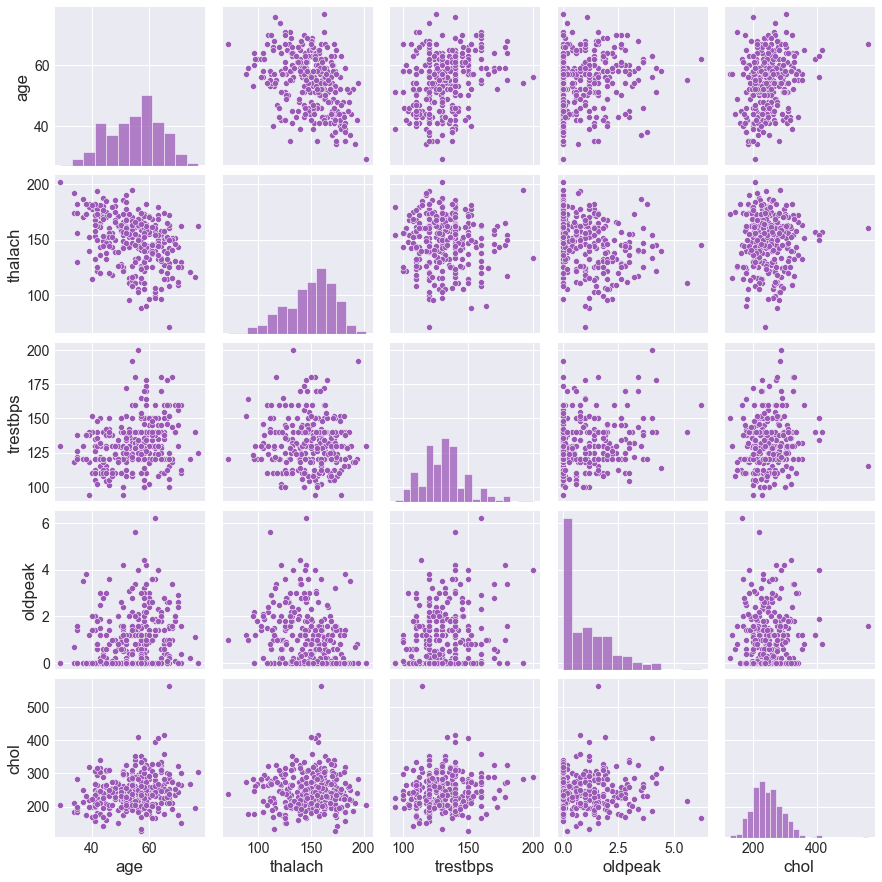

In [45]:
#EDA
sns.pairplot(data[['age','thalach','trestbps','oldpeak','chol']])

<AxesSubplot:>

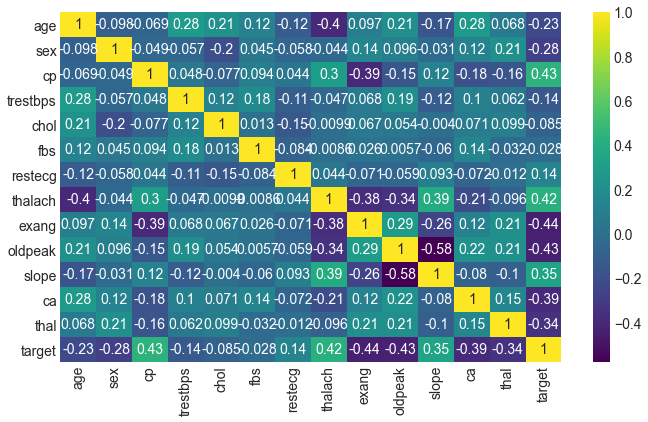

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [47]:
#observations: from the above chol is poorly correlated to the target variable, which might not be very useful to our prediction.

<AxesSubplot:xlabel='target', ylabel='count'>

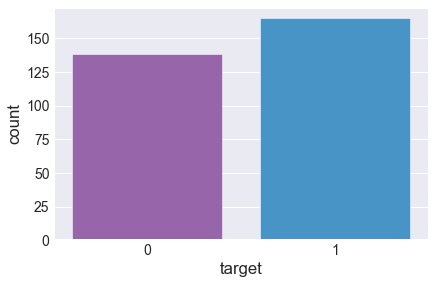

In [48]:
sns.countplot(data['target'])

<AxesSubplot:xlabel='fbs', ylabel='count'>

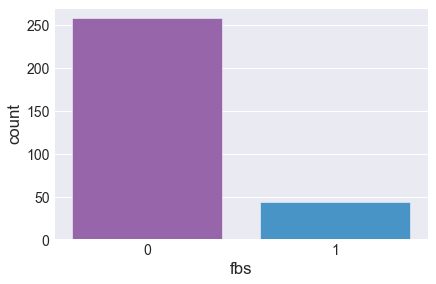

In [49]:
sns.countplot(data['fbs'])

<AxesSubplot:xlabel='slope', ylabel='age'>

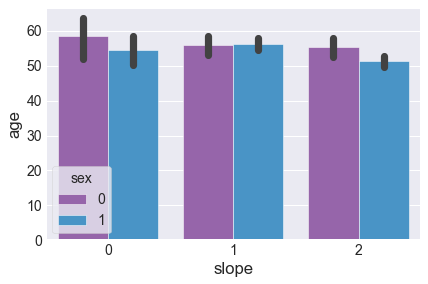

In [50]:
sns.barplot(x='slope',y='age',data=data,hue='sex')

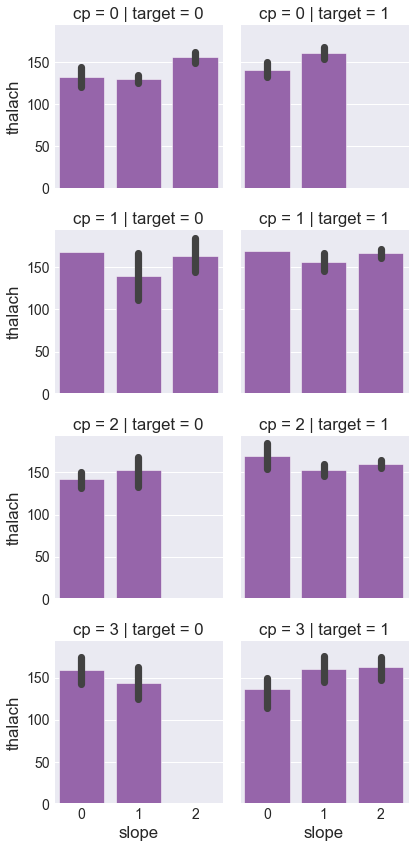

In [51]:
d = sns.FacetGrid(data=data,col='target',row='cp')
d.map(sns.barplot,'slope','thalach')

In [52]:
#observations: when cp is 0 target is 1 and slop is 2 thalanch has no value same with cp 2 target 0 ,cp 3 and target 0 slope 2 thalanch has no value

<AxesSubplot:xlabel='thalach', ylabel='Density'>

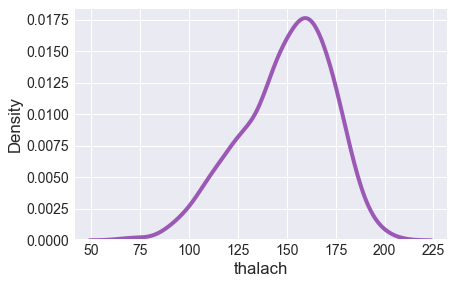

In [53]:
sns.kdeplot(data['thalach'])

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

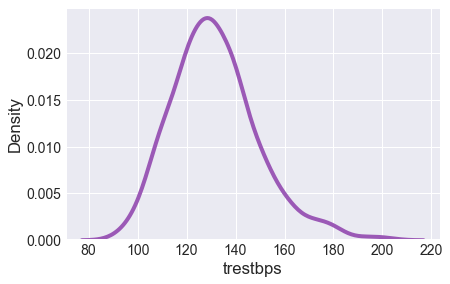

In [54]:
sns.kdeplot(data['trestbps'])

<AxesSubplot:xlabel='trestbps', ylabel='thalach'>

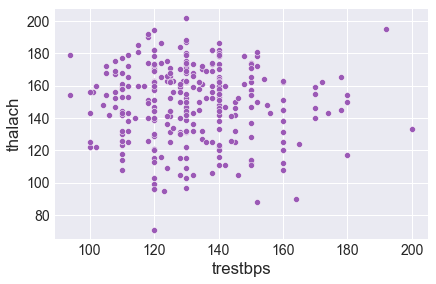

In [55]:
sns.scatterplot(data['trestbps'],data['thalach'])

<AxesSubplot:xlabel='trestbps', ylabel='age'>

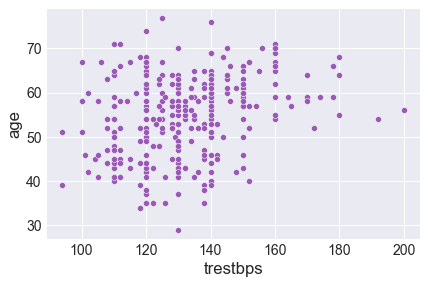

In [56]:
sns.scatterplot(data['trestbps'],data['age'])

<AxesSubplot:xlabel='trestbps'>

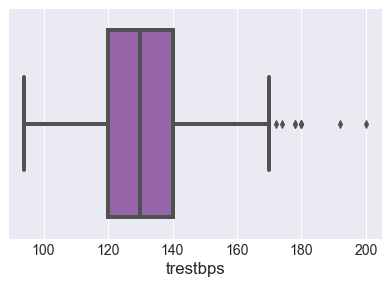

In [57]:
sns.boxplot(data['trestbps'])

<AxesSubplot:xlabel='chol'>

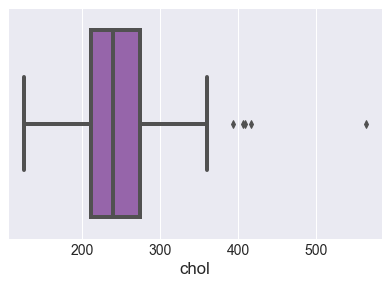

In [58]:
sns.boxplot(data['chol'])

In [59]:
IQR = data.trestbps.quantile(0.75) - data.trestbps.quantile(0.25)

Lower_fence = data.trestbps.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.trestbps.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(170.0, 90.0, 20.0)

In [60]:
data.query('trestbps >170 or trestbps < 90')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.00,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.00,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.00,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.00,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.00,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.40,1,0,2,0


In [61]:
IQR = data.chol.quantile(0.75) - data.chol.quantile(0.25)

Lower_fence = data.chol.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.chol.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(369.75, 115.75, 63.5)

In [62]:
data.query('chol >369.75 or chol < 115.75')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.80,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.60,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.20,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.00,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.90,1,2,3,0


<AxesSubplot:xlabel='cp', ylabel='thalach'>

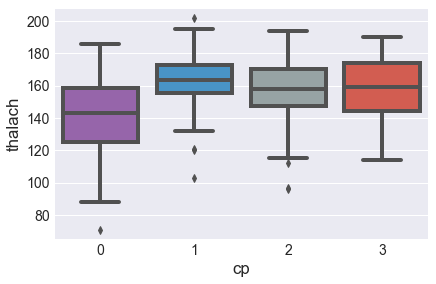

In [63]:
sns.boxplot(x=data['cp'],y = data['thalach'])

<AxesSubplot:xlabel='ca', ylabel='age'>

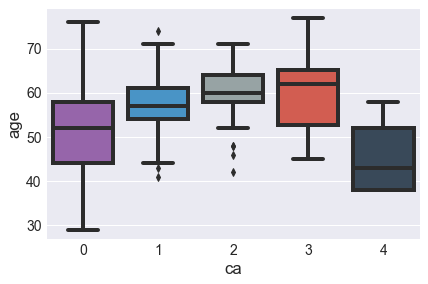

In [64]:
sns.boxplot(x=data['ca'],y=data['age'])


In [65]:
# Model Training

from sklearn.model_selection import train_test_split

In [66]:
X = data.drop('target',axis=1)
y = data['target']

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2, random_state=42)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [69]:
param = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
logistic =LogisticRegression()

In [70]:
model = GridSearchCV(logistic,param,cv=10,refit=True,verbose=3)

In [71]:
model.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 2/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 3/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 4/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 5/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 6/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 7/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 8/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 9/10] END ...........................C=0.001, penalty=l1; total time=   0.0s
[CV 10/10] END ..........................C=0.001, penalty=l1; total time=   0.0s
[CV 1/10] END ...........................C=0.001, penalty=l2; total time=   0.0s
[CV 2/10] END ...........................C=0.0

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<AxesSubplot:>

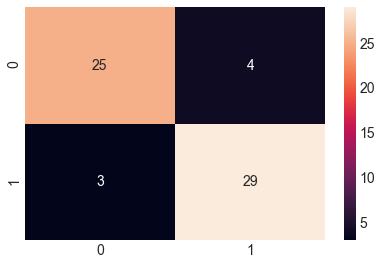

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

In [76]:
#Evaluators
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
    n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """Plots the learning curve of a regression or classfication model using their defualt metrics accuracy or r2_score"""
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Accuracy")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
    label="Cross-validation score")
    plt.legend(loc="best")
    return plt


In [77]:
def Probability_fpr_tpr(estimator,X,y):
    """Returns the false postive rate and true postive rate"""
    probab = estimator.predict_proba(X)[:,1]
    [fpr,tpr,thr] = roc_curve(y, probab)
    return fpr,tpr,thr


def Plot_Roc_Curve(train_fpr,train_tpr,thr1,test_fpr,test_tpr,thr2):
    """Used to plot Roc Curve For Training and Test Set to Check Overfitting in model"""
    plt.figure(figsize=(11,6))
    plt.plot(train_fpr, train_tpr, color = 'coral', label = "Train ROC curve area: "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, color = 'g', label = "Test ROC curve area: "+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (sensitivty)', fontsize=12)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()
    
    idx = np.min(np.where(train_tpr>0.95))
    print("Train-Set:")
    print("Using a threshold of %.3f " % thr1[idx] + "guarantees a sensitivity of %.3f " % train_tpr[idx]+
    "and a specificity of %.3f" % (1-train_fpr[idx]) +
    ", i.e. a false positive rate of %.2f%%." % (np.array(train_fpr[idx])*100))
    print("Test-Set:")
    idx = np.min(np.where(test_tpr>0.95))
    print("Using a threshold of %.3f " % thr2[idx] + "guarantees a sensitivity of %.3f " % test_tpr[idx]+
    "and a specificity of %.3f" % (1-test_fpr[idx]) +
    ", i.e. a false positive rate of %.2f%%." % (np.array(test_fpr[idx])*100))
    
    print("\n")
    if abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 > 4.5:
        print("........................................This model is overfitting........................................")
    elif abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 <= 4.5:
        print("........................................this model is a good fit........................................")
    elif abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 < 0.1:
        print("........................................this model is Underfitting........................................")    
    else:
        print("unknown fit")

In [78]:
# Accuracy learning curve
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import learning_curve,ShuffleSplit

In [79]:
X = data.drop('target',axis=1).values
y = data['target'].values
title = "Learning Curve"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)

<module 'matplotlib.pyplot' from '/Users/evanwireman/Documents/SchoolSpring2021/ExperimentalDesign/project/env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

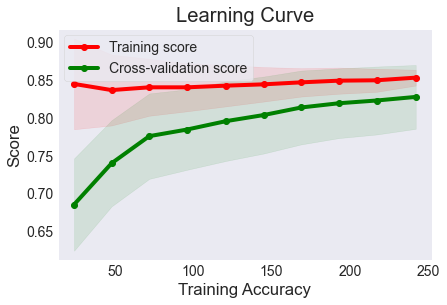

In [80]:
plot_learning_curve(model.best_estimator_,title,X,y,cv=cv)

In [81]:
#ROC Curve
train_fpr,train_tpr,thr1 = Probability_fpr_tpr(model,X_train,y_train)
test_fpr,test_tpr,thr2 = Probability_fpr_tpr(model,X_test,y_test)

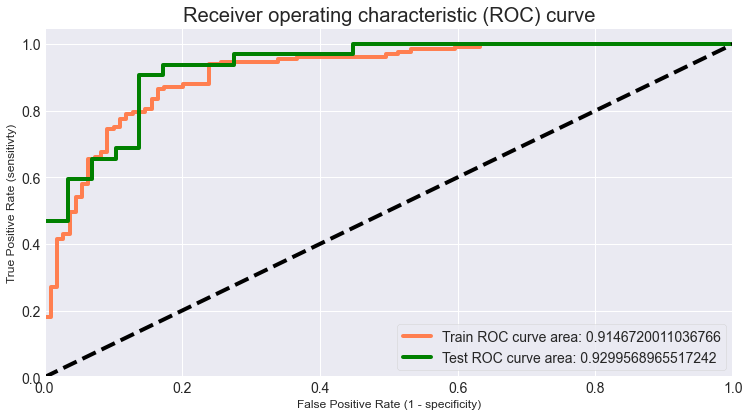

Train-Set:
Using a threshold of 0.397 guarantees a sensitivity of 0.955 and a specificity of 0.661, i.e. a false positive rate of 33.94%.
Test-Set:
Using a threshold of 0.152 guarantees a sensitivity of 0.969 and a specificity of 0.724, i.e. a false positive rate of 27.59%.


........................................this model is a good fit........................................


In [82]:
Plot_Roc_Curve(train_fpr,train_tpr,thr1,test_fpr,test_tpr,thr2)